<a href="https://colab.research.google.com/github/dkm4/Classification-with-NN/blob/main/Classification_Neural_Network_with_Loss_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [1]:
import torch

from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu121


# Get the device

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


# Generate classification dataset

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.02, random_state=42)

In [4]:
print(type(X))
print(type(y))
print(f"X shape  {X.shape}")
print("y shape ",y.shape)
print(f"First 4 values of X {X[:4]}")
print(f"First 4 values of y {y[:4]}")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X shape  (100, 2)
y shape  (100,)
First 4 values of X [[-0.41593533 -0.69359675]
 [ 0.75334204  0.32057287]
 [-0.64298186  0.48216909]
 [ 0.79109029 -0.59002501]]
First 4 values of y [1 1 1 0]


In [5]:
circles = pd.DataFrame({"X1":X[:, 0], "X2":X[:, 1], "label":y})
circles.head()

,X1,X2,label
0,-0.415935,-0.693597,1
1,0.753342,0.320573,1
2,-0.642982,0.482169,1
3,0.791090,-0.590025,0
4,0.758347,-0.707025,0


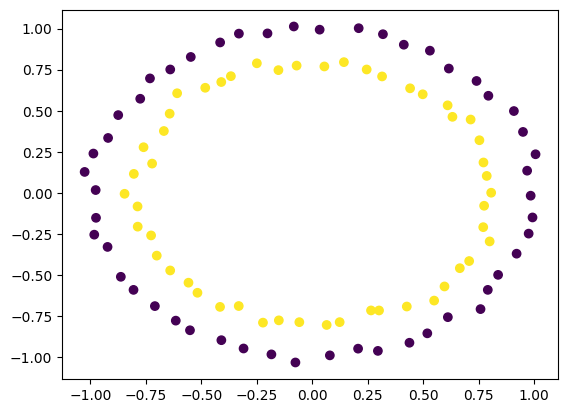

In [6]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

# Let's convert the data into tensors

In [7]:
X_tensor = torch.from_numpy(X)
print(X_tensor.shape, X_tensor.dtype)

torch.Size([100, 2]) torch.float64


In [8]:
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y)
print(X_tensor.shape, X_tensor.dtype)
print(y_tensor.shape, y_tensor.dtype)


torch.Size([100, 2]) torch.float32
torch.Size([100]) torch.int64


In [9]:
X_tensor = torch.from_numpy(X).type(torch.float).to(device)
y_tensor = torch.from_numpy(y).type(torch.float).to(device)
print(X_tensor.shape, X_tensor.dtype, X_tensor.device)
print(y_tensor.shape, y_tensor.dtype, y_tensor.device)


torch.Size([100, 2]) torch.float32 cpu
torch.Size([100]) torch.float32 cpu


In [10]:
print(len(X_tensor), X_tensor.shape)
print(len(y_tensor), y_tensor.shape)

100 torch.Size([100, 2])
100 torch.Size([100])


# Create train/test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

80 20 80 20


# Plot the training dataset

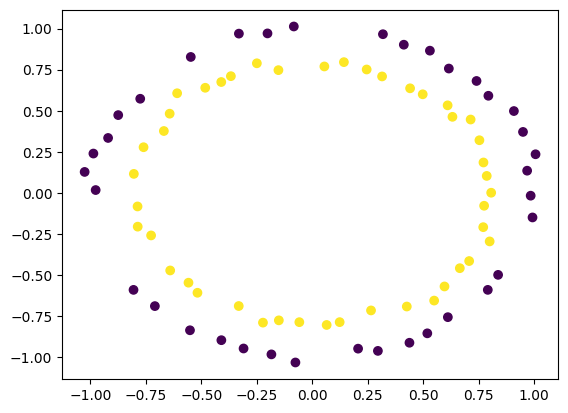

In [12]:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train)

# Plot test data points

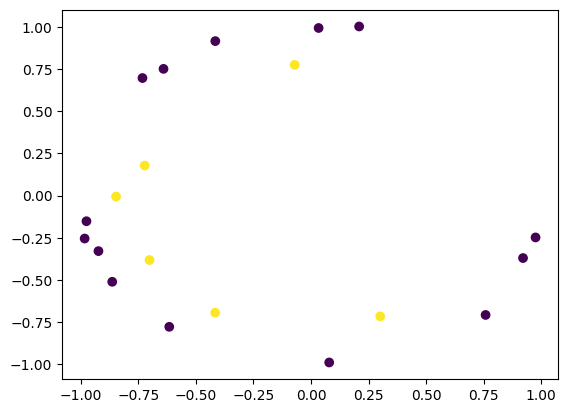

In [13]:
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test)

# Write the neural network architecture

In [14]:
class CircleNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(nn.Linear(in_features=2, out_features=10),
                               nn.ReLU(),
                               nn.Linear(in_features=10, out_features=20),
                               nn.ReLU(),
                               nn.Linear(in_features=20, out_features=20),
                               nn.ReLU(),
                               nn.Linear(in_features=20, out_features=1)
                               )

  def forward(self, x):
    return self.layer(x)


model = CircleNeuralNetwork()
model.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[ 0.3068,  0.0466],
                      [-0.5082, -0.6477],
                      [-0.6326,  0.3761],
                      [-0.6685,  0.2601],
                      [-0.3015,  0.3582],
                      [-0.2818,  0.1487],
                      [-0.1366,  0.6541],
                      [-0.1141,  0.6438],
                      [ 0.4043, -0.1373],
                      [ 0.2846,  0.2912]])),
             ('layer.0.bias',
              tensor([ 0.6103, -0.4466, -0.0860, -0.3676,  0.4621,  0.4309,  0.5595,  0.4231,
                      -0.6841, -0.5131])),
             ('layer.2.weight',
              tensor([[ 0.1497,  0.0823, -0.2064, -0.1272, -0.1830,  0.0040, -0.2845, -0.1723,
                        0.1659,  0.2913],
                      [ 0.0114, -0.0908,  0.2207,  0.2460,  0.1062, -0.0288,  0.0302, -0.2840,
                        0.0135,  0.0383],
                      [-0.2135, -0.1651, -0.0417,  0.0495,  0.2105,  0.2

In [15]:
#this code is also good but please dont use it for eval because it might be slow
#it will take (100, 2) and return (100, 1) shape
untrained_preds = model(X_test)
print(f"input shape given {X_test.shape}")
print(f"output shape is {untrained_preds.shape}")

input shape given torch.Size([20, 2])
output shape is torch.Size([20, 1])


In [16]:
#I am in evaluation stage, optimized and right way to ask for predictions from a pytorch neural network
model.eval() #I am in eval model
with torch.no_grad(): #Don't compute gradients
  untrained_preds = model(X_test)
print(X_test)
print(f"X test shape is {X_test.shape}")
print(untrained_preds)
print(f"y preds shape is {untrained_preds.shape}")


tensor([[-0.8632, -0.5105],
        [ 0.0791, -0.9886],
        [-0.7013, -0.3816],
        [-0.7318,  0.6969],
        [-0.9830, -0.2541],
        [-0.4155,  0.9157],
        [-0.9751, -0.1516],
        [-0.0707,  0.7748],
        [-0.6404,  0.7512],
        [-0.4159, -0.6936],
        [ 0.0331,  0.9934],
        [ 0.2091,  1.0024],
        [ 0.9753, -0.2477],
        [-0.9230, -0.3286],
        [ 0.3008, -0.7153],
        [ 0.7583, -0.7070],
        [-0.8464, -0.0054],
        [-0.6155, -0.7772],
        [-0.7222,  0.1785],
        [ 0.9209, -0.3698]])
X test shape is torch.Size([20, 2])
tensor([[-0.2085],
        [-0.2008],
        [-0.2182],
        [-0.1867],
        [-0.1985],
        [-0.2022],
        [-0.1950],
        [-0.2200],
        [-0.1907],
        [-0.2118],
        [-0.2197],
        [-0.2248],
        [-0.2130],
        [-0.2044],
        [-0.2051],
        [-0.1991],
        [-0.1985],
        [-0.2083],
        [-0.2013],
        [-0.2079]])
y preds shape is torch

In [17]:
#I am in evaluation stage, optimized and right way to ask for predictions from a pytorch neural network
model.eval() #I am in eval model
with torch.no_grad(): #Don't compute gradients
  untrained_preds = model(X_test)
print(untrained_preds)
print(f"y preds shape is {untrained_preds.shape}")
print(f"Actual y is {y_test}")

tensor([[-0.2085],
        [-0.2008],
        [-0.2182],
        [-0.1867],
        [-0.1985],
        [-0.2022],
        [-0.1950],
        [-0.2200],
        [-0.1907],
        [-0.2118],
        [-0.2197],
        [-0.2248],
        [-0.2130],
        [-0.2044],
        [-0.2051],
        [-0.1991],
        [-0.1985],
        [-0.2083],
        [-0.2013],
        [-0.2079]])
y preds shape is torch.Size([20, 1])
Actual y is tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 0.])


# Digression:Logits->Sigmoid->Actual prediction

In [18]:
model_predictions = torch.tensor([-0.58, 0.35, -0.94, 5.0, -19.0, 80.0])
print(f"My model's prediction also known as logits {model_predictions}")
sigmoid_on_predictions = torch.sigmoid(model_predictions)
print(f"sigmoid on top of predictions {sigmoid_on_predictions}. It gives numbers in range [0, 1]")
print(f"from sigmoid to actual prediction I just round the numbers i.e. >=0.5=1 and otherwise its 0 {torch.round(sigmoid_on_predictions)}")

My model's prediction also known as logits tensor([ -0.5800,   0.3500,  -0.9400,   5.0000, -19.0000,  80.0000])
sigmoid on top of predictions tensor([3.5893e-01, 5.8662e-01, 2.8090e-01, 9.9331e-01, 5.6028e-09, 1.0000e+00]). It gives numbers in range [0, 1]
from sigmoid to actual prediction I just round the numbers i.e. >=0.5=1 and otherwise its 0 tensor([0., 1., 0., 1., 0., 1.])


# Loss function and optimizer

In [19]:
loss_fn = nn.BCEWithLogitsLoss()
#criterion = nn.L1Loss()
#Stochastic gradient descent/Just memorize it because this is gradient descent algorithm to train NN
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

# Training Setup

In [21]:
# print(X_train.shape)
# print(y_train.shape)
logits = model(X_train)
print(f"y train shape is {y_train.shape}")
print(f"logits shape {logits.shape}")
print(f"loss value {loss_fn(logits, y_train.unsqueeze(1))}")
# sigmoids = torch.sigmoid(logits)
# print(f"sigmoids shape {sigmoids.shape}")


y train shape is torch.Size([80])
logits shape torch.Size([80, 1])
loss value 0.7107499837875366


In [22]:
# print(X_train.shape)
# print(y_train.shape)
logits = model(X_train)
print(f"y train shape is {y_train.shape}")
print(f"logits shape {logits.shape}")
print(f"loss value {loss_fn(logits.squeeze(), y_train)}")
# sigmoids = torch.sigmoid(logits)
# print(f"sigmoids shape {sigmoids.shape}")


y train shape is torch.Size([80])
logits shape torch.Size([80, 1])
loss value 0.7107499837875366


# Better training loop

In [23]:
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_true))*100.0
  return acc

t1 = torch.tensor([1.0, 0.0, 0.0])
t2 = torch.tensor([1.0, 0.0, 0.0])
t3 = torch.tensor([0.0, 1.0, 1.0])
print(acc_fn(t1, t2))
print(acc_fn(t1, t3))

100.0
0.0


In [24]:
epochs = 20000

train_loss_values = []
test_loss_values  = []
epoch_count       = []

for epoch in range(epochs):
  #put my model in training model
  model.train()
  #make predictions for my training dataset
  logits = model(X_train).squeeze()
  #I calculate the loss
  training_loss = loss_fn(logits, y_train)
  y_preds = torch.round(torch.sigmoid(logits))
  training_acc = acc_fn(y_train, y_preds)

  #make all the previous gradients to zero
  optimizer.zero_grad()
  #compute the gradients
  training_loss.backward()
  #take an optimization step
  optimizer.step()

  model.eval() #eval stage
  with torch.no_grad():
    test_logits = model(X_test).squeeze()
    test_loss = loss_fn(test_logits, y_test)
    y_preds = torch.round(torch.sigmoid(test_logits))
    testing_acc = acc_fn(y_test, y_preds)

  if epoch%10==0:
    epoch_count.append(epoch)
    # train_loss_values.append(training_loss)
    # test_loss_values.append(test_loss)
    train_loss_values.append(training_loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Training Loss: {training_loss} | Training Acc: {training_acc} | Testing Loss: {test_loss} | Testing Acc: {testing_acc}")


Epoch: 0 | Training Loss: 0.7107499837875366 | Training Acc: 45.0 | Testing Loss: 0.6585675477981567 | Testing Acc: 70.0
Epoch: 10 | Training Loss: 0.709020733833313 | Training Acc: 45.0 | Testing Loss: 0.6610070466995239 | Testing Acc: 70.0
Epoch: 20 | Training Loss: 0.7074007391929626 | Training Acc: 45.0 | Testing Loss: 0.6633855104446411 | Testing Acc: 70.0
Epoch: 30 | Training Loss: 0.7059146165847778 | Training Acc: 45.0 | Testing Loss: 0.6656972169876099 | Testing Acc: 70.0
Epoch: 40 | Training Loss: 0.704595685005188 | Training Acc: 45.0 | Testing Loss: 0.6679402589797974 | Testing Acc: 70.0
Epoch: 50 | Training Loss: 0.7034098505973816 | Training Acc: 45.0 | Testing Loss: 0.6701107621192932 | Testing Acc: 70.0
Epoch: 60 | Training Loss: 0.7023218870162964 | Training Acc: 45.0 | Testing Loss: 0.6722478866577148 | Testing Acc: 70.0
Epoch: 70 | Training Loss: 0.701335072517395 | Training Acc: 45.0 | Testing Loss: 0.6743154525756836 | Testing Acc: 70.0
Epoch: 80 | Training Loss: 0

KeyboardInterrupt: 

In [ ]:
print(f"My epoch count {epoch_count}")
print(f"My training loss values are {train_loss_values}")
print(f"My testing loss values are {test_loss_values}")

# Plot the loss curve

# When training model for longer or more data will not help

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and test loss curves")
plt.xlabel("Epoch count")
plt.ylabel("Loss")
plt.legend()

# May be training for longer time will help

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and test loss curves")
plt.xlabel("Epoch count")
plt.ylabel("Loss")
plt.legend()